# Import Library

In [1]:
!pip install sastrawi
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.9 MB/s eta 0:00:00


In [2]:
# Data Processing & Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Content Based Filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Cluster Based Filtering
from sklearn.cluster import KMeans
print('Library Loaded!')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Library Loaded!


# Data Understanding

The `Mamikos.csv` dataset was collected via **web scraping** using the **Data Miner** Chrome extension.  
It contains data about rental properties (boarding houses/kos-kosan) in **Salatiga**, Indonesia.


**🧾 Dataset Columns**

* `nama_kos` : Name of the boarding house available for rent
* `tipe` : boarding houses/kos-kosan Type -> Putra, Putri, Campur
* `alamat`:  Sub-district where the boarding house is located  
* `fasilitas`: Facilities or amenities provided (e.g., Wi-Fi, AC)    
* `harga`: Rental price of the boarding house.

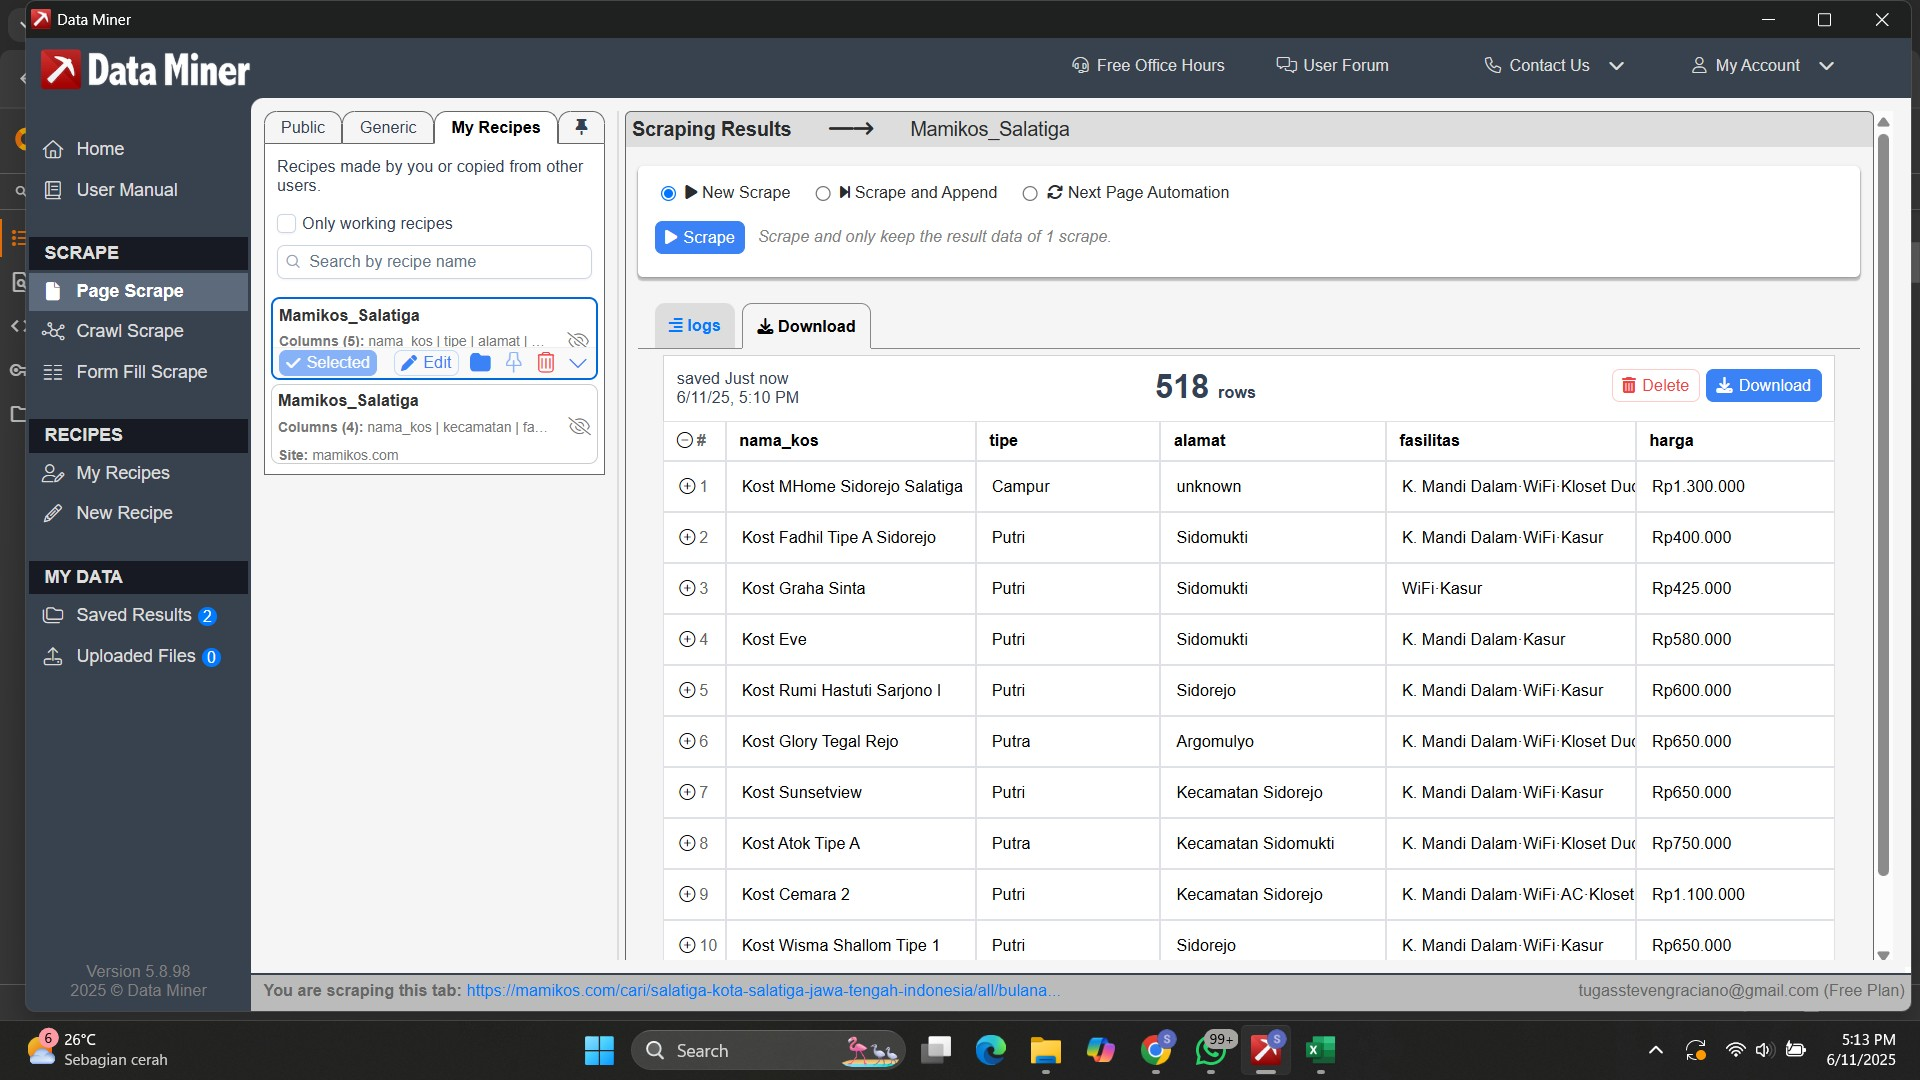

**Import Data**
* Import data from Google Drive
* Show First 20 Rows

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dicoding/Machine Learning Terapan/Mamikos Reccomendation/Mamikos.csv')
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
nama_kos,Kost MHome Sidorejo Salatiga,Kost Fadhil Tipe A Sidorejo,Kost Graha Sinta,Kost Eve,Kost Rumi Hastuti Sarjono I,Kost Glory Tegal Rejo,Kost Sunsetview,Kost Atok Tipe A,Kost Cemara 2,Kost Wisma Shallom Tipe 1,Kost Oikos,Kost Glory 2 Tipe A,Kost Patimura 91 Tipe A,Kost Edelweis Tipe Exclusive,Kost Bu Didin,Kost Nice Trendy,Kost Cozy House Tipe A,Kost Prima,Kost Hidden Homestay Double Room,Kost Hidden Homestay Single Room
tipe,Campur,Putri,Putri,Putri,Putri,Putra,Putri,Putra,Putri,Putri,Putri,Putri,Putri,Putri,Putra,Putri,Campur,Putri,Campur,Campur
alamat,unknown,Sidomukti,Sidomukti,Sidomukti,Sidorejo,Argomulyo,Kecamatan Sidorejo,Kecamatan Sidomukti,Kecamatan Sidorejo,Sidorejo,Kecamatan Argomulyo,Argomulyo,Kecamatan Sidorejo,Sidorejo,Tingkir,Sidorejo,Sidomukti,Sidorejo,Kecamatan Sidomukti,Sidomukti
fasilitas,K. Mandi Dalam·WiFi·Kloset Duduk·Kasur,K. Mandi Dalam·WiFi·Kasur,WiFi·Kasur,K. Mandi Dalam·Kasur,K. Mandi Dalam·WiFi·Kasur,K. Mandi Dalam·WiFi·Kloset Duduk·Kasur·Akses 2...,K. Mandi Dalam·WiFi·Kasur,K. Mandi Dalam·WiFi·Kloset Duduk·Kasur,K. Mandi Dalam·WiFi·AC·Kloset Duduk·Kasur,K. Mandi Dalam·WiFi·Kasur,K. Mandi Dalam·WiFi·Kloset Duduk·Kasur·Akses 2...,K. Mandi Dalam·WiFi·Kloset Duduk·Kasur·Akses 2...,WiFi·Kloset Duduk·Kasur·Akses 24 Jam,K. Mandi Dalam·WiFi·AC·Kasur·Akses 24 Jam,K. Mandi Dalam·Kasur·Akses 24 Jam,K. Mandi Dalam·WiFi·AC·Kasur·Akses 24 Jam,Kloset Duduk·Kasur·Akses 24 Jam,K. Mandi Dalam·WiFi·Kloset Duduk·Kasur,K. Mandi Dalam·WiFi·AC·Kloset Duduk·Kasur,K. Mandi Dalam·WiFi·Kloset Duduk·Kasur·Akses 2...
harga,Rp1.300.000,Rp400.000,Rp425.000,Rp580.000,Rp600.000,Rp650.000,Rp650.000,Rp750.000,Rp1.100.000,Rp650.000,Rp700.000,Rp500.000,Rp850.000,Rp1.250.000,Rp800.000,Rp1.400.000,Rp1.500.000,Rp650.000,Rp1.650.000,Rp1.200.000


there is unknown alamat in Kost MHome Sidorejo Salatiga, we have to convert it to sidorejo because the name is Kost MHome **Sidorejo** Salatiga

**EDA : Exploratory Data Analysis**

**Data Shape**


In [4]:
print(f'Column Count: {df.shape[1]}')
print(f'Row Count: {df.shape[0]}')
df.info()

Column Count: 5
Row Count: 518
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nama_kos   518 non-null    object
 1   tipe       518 non-null    object
 2   alamat     518 non-null    object
 3   fasilitas  507 non-null    object
 4   harga      518 non-null    object
dtypes: object(5)
memory usage: 20.4+ KB


- Data include 518 rows and 5 column
- All columns are in **object/string format**, including the `harga` (price) column.
- In the **data preparation stage**, we will **convert `harga` to a numeric data type** to enable proper analysis and modeling.

**Chek Missing Values**

In [5]:
df.isnull().sum()

,0
nama_kos,0
tipe,0
alamat,0
fasilitas,11
harga,0


- There are **11 missing values** found in the **`fasilitas`** column.
- Because is only 11 missing data, We can Delete  Missing values in Data Preparation later.

**Check Duplicate Values**

In [6]:
df.duplicated().sum()

np.int64(291)

  There are **291 duplicated entries** in the dataset. we can delete duplicate values later in data preparation.


**Data Visualization**

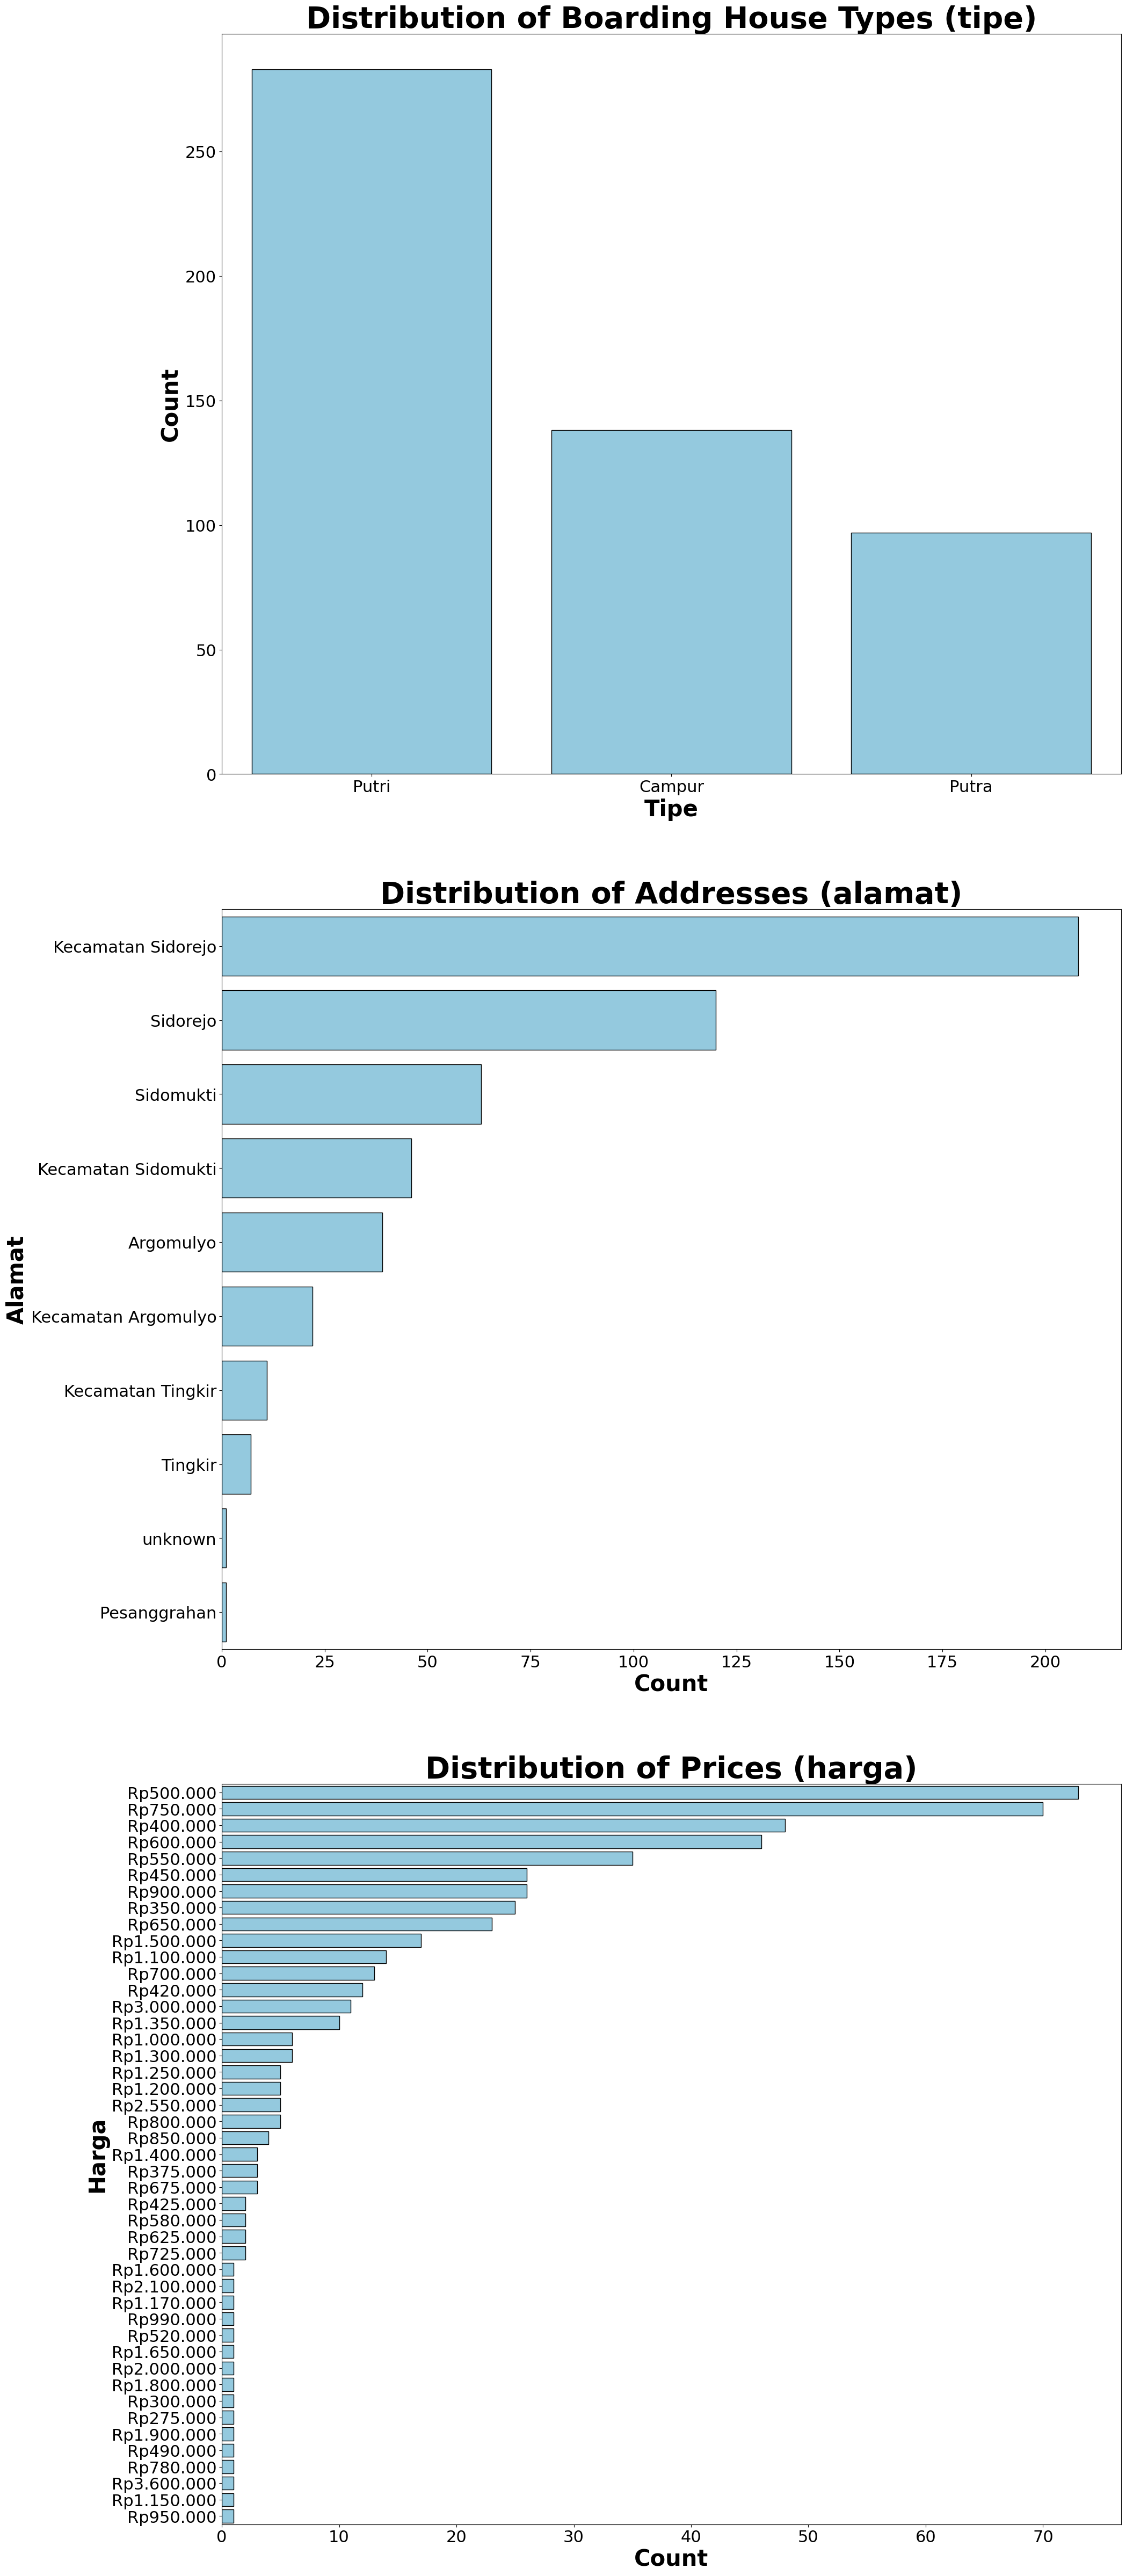

In [7]:
# --- Font and Style Definitions (Made more robust) ---
title_font_properties = {
    'weight': 'bold',
    'size': 40
}

# Define the properties for axis labels
label_font_properties = {
    'weight': 'bold',
    'size': 30
}

# Define properties for the tick labels
tick_font_properties = {
    'size': 22
}


# --- Plotting ---
# Create a figure and subplots arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(23, 50))

# Plot 1: Count plot for 'tipe'
sns.countplot(ax=axes[0], x='tipe', data=df, color='skyblue', edgecolor='black', order=df['tipe'].value_counts().index)
axes[0].set_title('Distribution of Boarding House Types (tipe)', fontdict=title_font_properties)
axes[0].set_xlabel("Tipe", fontdict=label_font_properties)
axes[0].set_ylabel("Count", fontdict=label_font_properties)

# Plot 2: Horizontal Count plot for 'alamat'
sns.countplot(ax=axes[1], y='alamat', data=df, color='skyblue', edgecolor='black', order=df['alamat'].value_counts().index)
axes[1].set_title('Distribution of Addresses (alamat)', fontdict=title_font_properties)
axes[1].set_xlabel("Count", fontdict=label_font_properties)
axes[1].set_ylabel("Alamat", fontdict=label_font_properties)

# Plot 3: Horizontal Count plot for 'harga'
sns.countplot(ax=axes[2], y='harga', data=df, color='skyblue', edgecolor='black', order=df['harga'].value_counts().index)
axes[2].set_title('Distribution of Prices (harga)', fontdict=title_font_properties)
axes[2].set_xlabel("Count", fontdict=label_font_properties)
axes[2].set_ylabel("Harga", fontdict=label_font_properties)

# --- Final Touches ---
# Apply tick font styles to all subplots
for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_fontsize(tick_font_properties['size'])
    for label in ax.get_yticklabels():
        label.set_fontsize(tick_font_properties['size'])


# Adjust layout to prevent labels from overlapping
fig.tight_layout(pad=8.0)

# To save the figure to a file:
plt.savefig('boarding_house_distributions_vertical_fixed.png')

# To display the plot in a script or notebook, you would use:
plt.show()

**Data Understanding Insights**

- **Inconsistent Values**  
  We found inconsistent values in the `alamat` column — some entries only mention the area name (e.g., "Sidorejo"), while others include the word "Kecamatan" (e.g., "Kecamatan Sidomukti").  
  > **Action**: Standardize all entries by removing the prefix **"Kecamatan"** so they merge under a unified value (e.g., `"Kecamatan Sidomukti"` → `"Sidomukti"`).

- **Unknown Values**  
  We found unknown or improperly formatted values in the `alamat` column, such as `"Kost MHome Sidorejo Salatiga"`.  
  > **Action**: These entries will be **renamed/cleaned** for consistency and quality.

- **Missing Values**  
  There are `11 missing values` in the `fasilitas` column.  
  > **Action**: Rows with missing values will be **dropped** to ensure data integrity.

- **Duplicate Entries**  
  We discovered `291 duplicate rows` in the dataset.  
  > **Action**: All duplicates will be **removed** to prevent data bias.

- **Incorrect Data Type**  
  The `harga` (price) column is currently of type **object (string)**.  
  > **Action**: It will be **converted to a numeric type** to enable proper calculations and modeling.


#Data Preparation

In this stage, we apply all the findings from the data understanding phase. The following actions are taken to clean and prepare the data:

* **Inconsistent Values**  
  * We found inconsistent values in the `alamat` column — some entries only mention the area name (e.g., "Sidorejo"), while others include the word "Kecamatan" (e.g., "Kecamatan Sidomukti").  
  * **Action**: Standardize all entries by removing the prefix **"Kecamatan"** so they merge under a unified value (e.g., `"Kecamatan Sidomukti"` → `"Sidomukti"`).

* **Rename Unknown Values**  
  * We Found unknown values in alamat of `Kost MHome Sidorejo Salatiga`
  * **Action**: These rows will be **Rename** to maintain data quality.


* **Missing Values**  
  * There are 11 missing values in the `fasilitas` column.  
  * **Action**: These rows will be dropped to maintain data quality.

* **Duplicate Entries**  
  * The dataset contains 291 duplicated rows.  
  * **Action**: These rows will be **dropped** to maintain data quality.

* **Incorrect Data Type**  
  * The `harga` (price) column is currently stored as an object (string).  
  * **Action**: This column will be converted into a numeric data type for better analysis and modeling.

---

**Text Preprocessing**

Further preprocessing will be applied to all text columns:

* **Text Cleaning**  
Standardizing text format by converting to lowercase and removing extra whitespace.

* **Tokenization**  
Splitting text into individual words (tokens) for easier manipulation and analysis.

* **Stopword Removal**  
Eliminating common words that carry little analytical value, such as “and”, “in”, “the”, etc.

---

**Feature Engineering**

* **Using a Cleaned DataFrame**

  In this step, we eliminate unnecessary columns and store the refined data into a new variable called `df_clean`. This allows us to focus only on the relevant features for our recommendation system.

* **Creating a Combined Feature Column for Recommendation System**

  Next, we create a new column called `FITUR_LENGKAP` by combining the values from the `TIPE`, `ALAMAT`, and `FASILITAS` columns. This combined text will serve as the input feature for the content-based recommendation system using **TF-IDF** and **Cosine Similarity** methods.

  ---

**Feature Extraction with TF-IDF**:

* To extract important textual features, we use TF-IDF (Term Frequency Inverse Document Frequency), a statistical method that evaluates how relevant a word is to a document in a collection (or corpus).

TF-IDF highlights words that are unique and meaningful, while down-weighting common words across documents.

**TF-IDF is written in the formula:**
$$
TF(t,d) = \frac{\text{number of times t appears in d}}{\text{total number of term in d}}
$$


$$IDF(t,D) = log \frac {N} {1+df}$$

$$TFD(t,d) = TF(t,d) * IDF(t)$$

Where:

- **TF(t, d)**: Term Frequency — measures how often a term `t` appears in a document `d`. The higher the frequency, the more important the term is **within that specific document**.

- **IDF(t, D)**: Inverse Document Frequency — measures how unique or important a term `t` is **across the entire corpus `D`**. If a term appears in many documents, its IDF will be lower because it's considered less informative.



**0. Rename Unknown Values in `Kost MHome Sidorejo Salatiga`**

In [8]:
df['alamat'] = df['alamat'].replace('unknown', 'sidorejo')

In [9]:
df[df.nama_kos == 'Kost MHome Sidorejo Salatiga']

,nama_kos,tipe,alamat,fasilitas,harga
0,Kost MHome Sidorejo Salatiga,Campur,sidorejo,K. Mandi Dalam·WiFi·Kloset Duduk·Kasur,Rp1.300.000


Unknown data has been handled!

**1. Check Duplicate Values**

In [10]:
df.duplicated().sum()

np.int64(291)

**2. Drop Duplicated**

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

Duplicate data has been handled!

**3. Drop Missing Values**

In [13]:
df.dropna(inplace=True)

Null data has been handled!

**4. Create Function to Preprocess Text**

In [14]:
stop_words = set(stopwords.words('indonesian')).union(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.replace("·", " ")
    text = text.replace("kecamatan", "") # Delete Kecamatan

    # Text Normalization
    text = text.replace("k.", "kamar")
    text = text.replace("kloset duduk", "kloset")

    # Remove Punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def tokenize_text(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

def preprocess_text(text):
    text = clean_text(text)
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    return ' '.join(tokens)

**5. Create Function to Convert `harga` Column to `Integer`**

In [15]:
def clean_harga(text):
    if pd.isnull(text):
        return 0
    cleaned = re.sub(r'[^\d]', '', text)
    return int(cleaned)

**6. Preprocess Text All Column and Handling Dtype Harga**

In [16]:
# Preprocess NAMAKOS to lower only, because is a real name.
df['NAMAKOS'] = df['nama_kos'].str.lower()

df['TIPE'] = df['tipe'].apply(preprocess_text)
df['ALAMAT'] = df['alamat'].apply(preprocess_text)
df['FASILITAS'] = df['fasilitas'].apply(preprocess_text)
df['HARGA'] = df['harga'].apply(clean_harga)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 0 to 449
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nama_kos   226 non-null    object
 1   tipe       226 non-null    object
 2   alamat     226 non-null    object
 3   fasilitas  226 non-null    object
 4   harga      226 non-null    object
 5   NAMAKOS    226 non-null    object
 6   TIPE       226 non-null    object
 7   ALAMAT     226 non-null    object
 8   FASILITAS  226 non-null    object
 9   HARGA      226 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 19.4+ KB


After cleaning our data now is only 226 rows

In [18]:
df.head()

,nama_kos,tipe,alamat,fasilitas,harga,NAMAKOS,TIPE,ALAMAT,FASILITAS,HARGA
0,Kost MHome Sidorejo Salatiga,Campur,sidorejo,K. Mandi Dalam·WiFi·Kloset Duduk·Kasur,Rp1.300.000,kost mhome sidorejo salatiga,campur,sidorejo,kamar mandi wifi kloset kasur,1300000
1,Kost Fadhil Tipe A Sidorejo,Putri,Sidomukti,K. Mandi Dalam·WiFi·Kasur,Rp400.000,kost fadhil tipe a sidorejo,putri,sidomukti,kamar mandi wifi kasur,400000
2,Kost Graha Sinta,Putri,Sidomukti,WiFi·Kasur,Rp425.000,kost graha sinta,putri,sidomukti,wifi kasur,425000
3,Kost Eve,Putri,Sidomukti,K. Mandi Dalam·Kasur,Rp580.000,kost eve,putri,sidomukti,kamar mandi kasur,580000
4,Kost Rumi Hastuti Sarjono I,Putri,Sidorejo,K. Mandi Dalam·WiFi·Kasur,Rp600.000,kost rumi hastuti sarjono i,putri,sidorejo,kamar mandi wifi kasur,600000


In the dataframe above, we can see which columns have already been preprocessed and which ones have not.  

From here on, we will use only the **preprocessed columns** as our primary dataset for further analysis and modeling.  
This ensures the data is clean, standardized, and ready for machine learning tasks.


In [19]:
df_clean = df[['NAMAKOS','TIPE', 'ALAMAT', 'FASILITAS', 'HARGA']]
df_clean.head()

,NAMAKOS,TIPE,ALAMAT,FASILITAS,HARGA
0,kost mhome sidorejo salatiga,campur,sidorejo,kamar mandi wifi kloset kasur,1300000
1,kost fadhil tipe a sidorejo,putri,sidomukti,kamar mandi wifi kasur,400000
2,kost graha sinta,putri,sidomukti,wifi kasur,425000
3,kost eve,putri,sidomukti,kamar mandi kasur,580000
4,kost rumi hastuti sarjono i,putri,sidorejo,kamar mandi wifi kasur,600000


In [20]:
df_clean['HARGA'].describe()

,HARGA
count,2.260000e+02
mean,7.408186e+05
std,4.246571e+05
min,2.750000e+05
25%,5.000000e+05
50%,6.250000e+05
75%,7.950000e+05
max,3.600000e+06


In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 0 to 449
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NAMAKOS    226 non-null    object
 1   TIPE       226 non-null    object
 2   ALAMAT     226 non-null    object
 3   FASILITAS  226 non-null    object
 4   HARGA      226 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 10.6+ KB


**7. Check Distribution of Harga after Preprocess**

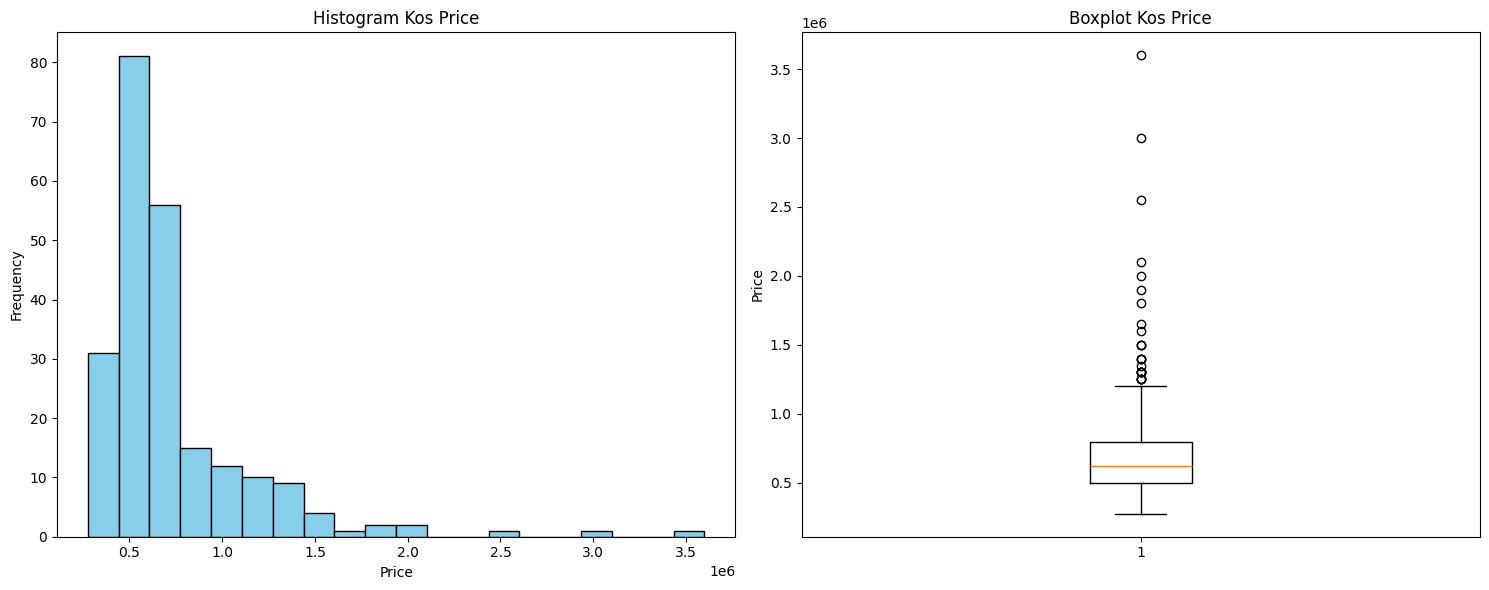

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
axes[0].hist(df_clean['HARGA'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram Kos Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Boxplot
axes[1].boxplot(df_clean['HARGA'])
axes[1].set_title('Boxplot Kos Price')
axes[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

**8. Check the Number of Boarding Houses in Each District**

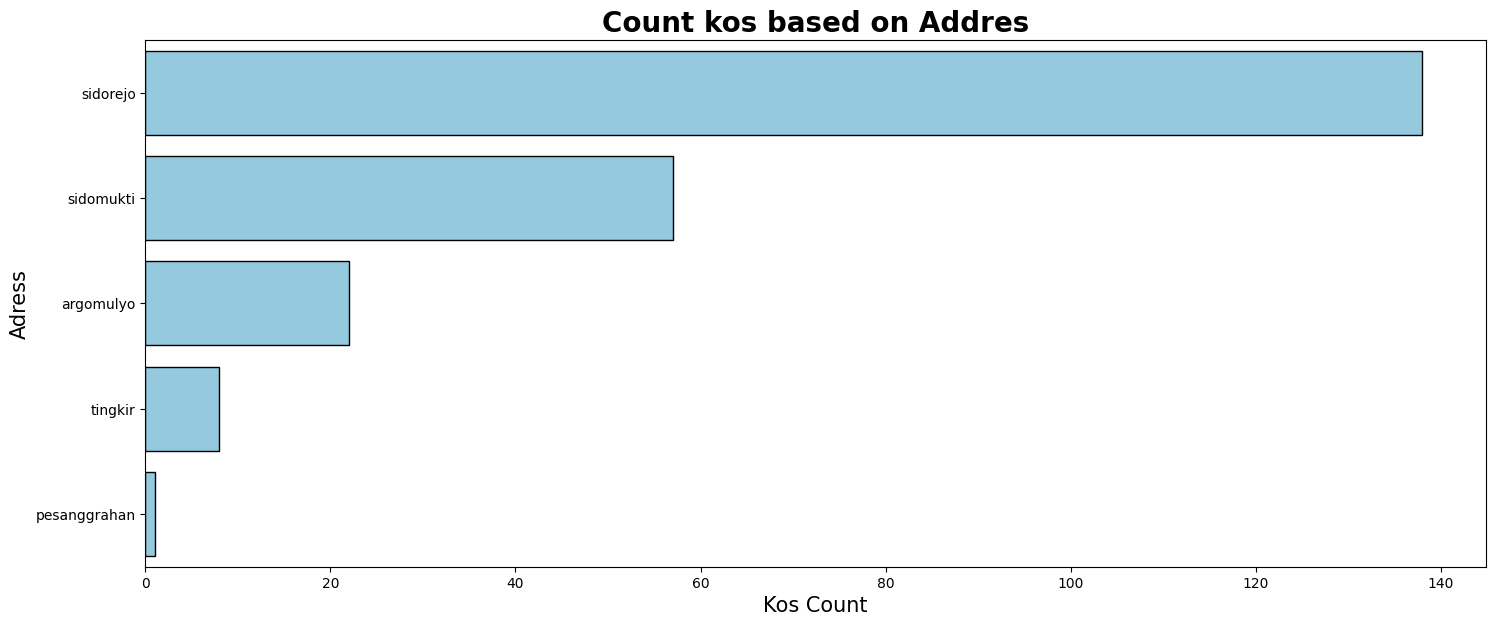

In [23]:
plt.figure(figsize = (15,6))

sns.countplot(
    data = df_clean,
    y = 'ALAMAT',
    color = 'skyblue',
    edgecolor = 'black'
)
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.title('Count kos based on Addres', fontsize = 20, fontweight = 'bold')
plt.ylabel('Adress', fontsize = 15)
plt.xlabel('Kos Count', fontsize = 15)
plt.show()

**8. Check the Number of Boarding Houses Based on Type**

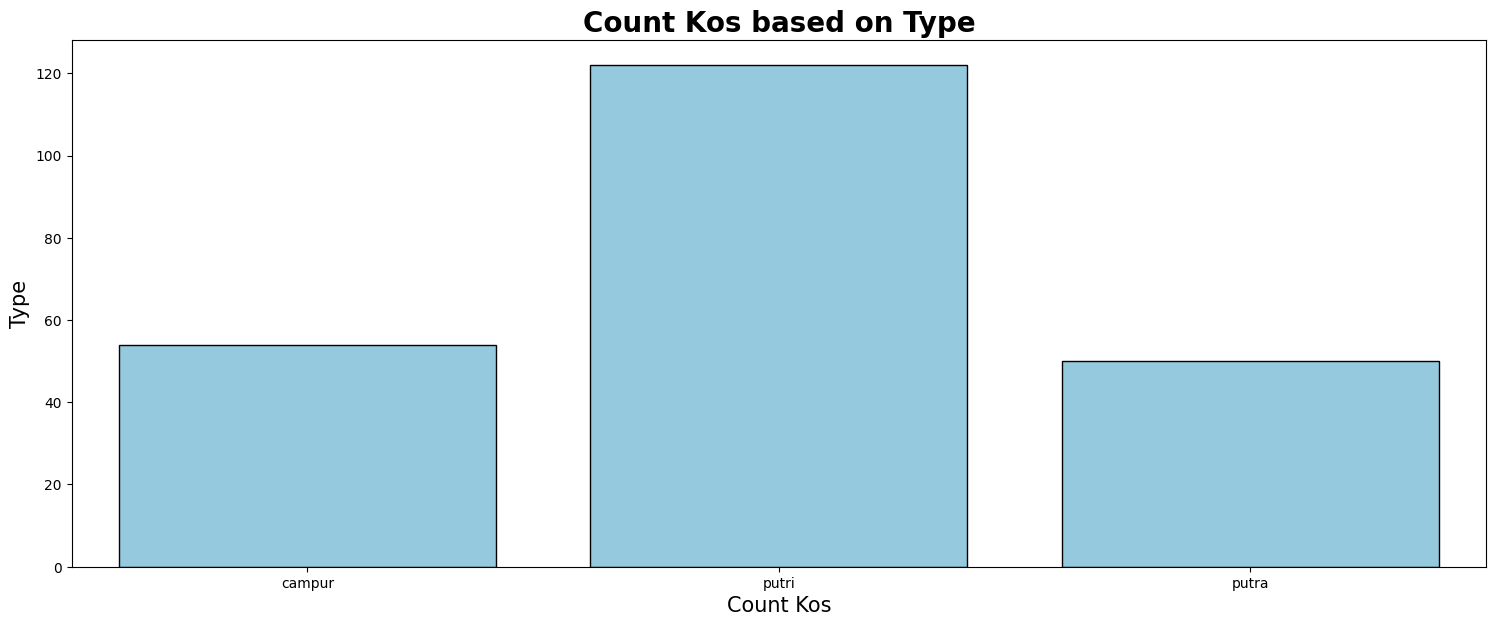

In [24]:
plt.figure(figsize = (15,6))

sns.countplot(
    data = df_clean,
    x = 'TIPE',
    color = 'skyblue',
    edgecolor = 'black'
)
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.title('Count Kos based on Type', fontsize = 20, fontweight = 'bold')
plt.ylabel('Type', fontsize = 15)
plt.xlabel('Count Kos', fontsize = 15)
plt.show()

**9. Create new Feature `Fitur Lengkap` to merge column tipe, alamat, and fasilitas**

we create a new column called FITUR_LENGKAP by combining the values from the TIPE, ALAMAT, and FASILITAS columns. This combined text will serve as the input feature for the content-based recommendation system using TF-IDF and Cosine Similarity methods.

In [25]:
df_clean['FITUR_LENGKAP'] = df_clean[['TIPE', 'ALAMAT', 'FASILITAS']].agg(' '.join, axis=1)

<ipython-input-25-3073275015>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['FITUR_LENGKAP'] = df_clean[['TIPE', 'ALAMAT', 'FASILITAS']].agg(' '.join, axis=1)


In [26]:
df_clean.head()

,NAMAKOS,TIPE,ALAMAT,FASILITAS,HARGA,FITUR_LENGKAP
0,kost mhome sidorejo salatiga,campur,sidorejo,kamar mandi wifi kloset kasur,1300000,campur sidorejo kamar mandi wifi kloset kasur
1,kost fadhil tipe a sidorejo,putri,sidomukti,kamar mandi wifi kasur,400000,putri sidomukti kamar mandi wifi kasur
2,kost graha sinta,putri,sidomukti,wifi kasur,425000,putri sidomukti wifi kasur
3,kost eve,putri,sidomukti,kamar mandi kasur,580000,putri sidomukti kamar mandi kasur
4,kost rumi hastuti sarjono i,putri,sidorejo,kamar mandi wifi kasur,600000,putri sidorejo kamar mandi wifi kasur


**10. Feature Extraction Using TF-IDF and Show the Feature Name**

In [27]:
# TfidfVectorizer Initiation
tf = TfidfVectorizer()

# Calculating
tf.fit(df_clean['FITUR_LENGKAP'])

# Get Feature Name
tf.get_feature_names_out()

array(['24', 'ac', 'akses', 'argomulyo', 'campur', 'jam', 'kamar',
       'kasur', 'kloset', 'mandi', 'pesanggrahan', 'putra', 'putri',
       'sidomukti', 'sidorejo', 'tingkir', 'wifi'], dtype=object)

**11. Transforming Text into TF-IDF Matrix and Check Matrix Shape**

In [28]:
# Do fit and transform into matrix
tfidf_matrix = tf.fit_transform(df_clean['FITUR_LENGKAP'])

# matrix shape
tfidf_matrix.shape

(226, 17)

In [29]:
print(tfidf_matrix[1])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (1, 17)>
  Coords	Values
  (0, 6)	0.36596724707172235
  (0, 9)	0.36596724707172235
  (0, 16)	0.3010392826454801
  (0, 7)	0.2683531675076702
  (0, 12)	0.4252309140683879
  (0, 13)	0.6234392878660665


**12.Converting TF-IDF Matrix to Dense Format**

To make it more readable, we convert the sparse matrix into a dense format and sample a few rows and column

In [30]:
tfidf_matrix.todense()
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=df_clean.FITUR_LENGKAP
).sample(10, axis=1).sample(10, axis=0)

,akses,putri,putra,tingkir,kamar,24,sidomukti,kasur,jam,campur
FITUR_LENGKAP,,,,,,,,,,
campur sidomukti kasur akses 24 jam,0.357065,0.000000,0.00000,0.0,0.000000,0.357065,0.526141,0.226472,0.357065,0.537959
putri sidorejo kamar mandi wifi kloset kasur,0.000000,0.424992,0.00000,0.0,0.365762,0.000000,0.000000,0.268203,0.000000,0.000000
putra sidomukti kamar mandi wifi kloset kasur akses 24 jam,0.297418,0.000000,0.46209,0.0,0.257259,0.297418,0.438251,0.188641,0.297418,0.000000
putri sidorejo kamar mandi wifi ac kloset kasur akses 24 jam,0.286025,0.287468,0.00000,0.0,0.247405,0.286025,0.000000,0.181415,0.286025,0.000000
campur sidomukti kamar mandi wifi kasur akses 24 jam,0.318690,0.000000,0.00000,0.0,0.275659,0.318690,0.469596,0.202133,0.318690,0.480144
campur argomulyo kamar mandi wifi akses 24 jam,0.295209,0.000000,0.00000,0.0,0.255348,0.295209,0.000000,0.000000,0.295209,0.444766
putri sidomukti wifi kasur,0.000000,0.496969,0.00000,0.0,0.000000,0.000000,0.728615,0.313625,0.000000,0.000000
putri sidorejo wifi kasur,0.000000,0.602635,0.00000,0.0,0.000000,0.000000,0.000000,0.380309,0.000000,0.000000
campur sidorejo wifi kloset kasur,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.274062,0.000000,0.651004


This output shows the importance scores of feature names (words) that have been extracted from the FITUR_LENGKAP text column using TF-IDF.

For example, in the first row and first column, the word "kamar" (room) has a TF-IDF score of approximately 0.274. This indicates that the word "kamar" appears in the corresponding FITUR_LENGKAP entry on the left and carries a moderate level of importance in describing the boarding house's features. A higher score means the word is more relevant or unique to that specific description.

# Modelling

## Content Based Filtering

In this section, we build a recommendation system using a **content-based filtering approach**.  
The main focus is on utilizing the **`FITUR_LENGKAP`** column — which has been preprocessed in the **Data Preparation** phase.  
This column contains **detailed textual descriptions** of each boarding house’s features (e.g., type, location, facilities).

**Cosine Similarity for Reccomendation System** :

Once the TF-IDF vectors are generated, we use **Cosine Similarity** to measure how similar two items are.

Cosine similarity is a metric that calculates the cosine of the angle between two vectors in a multi-dimensional space.

The result ranges from -1 to 1:
- `1` means the vectors are perfectly similar (point in the same direction),
- `0` means they are unrelated (perpendicular),
- `-1` means they are completely opposite.

This method is widely used in text analysis and recommendation systems to compare the similarity between documents or items.

**Cosine similarity is written in the formula:**


$$Cosine Similarity  (A, B) = (A · B) / (||A|| * ||B||)$$


where:
- (A·B) : denotes the dot product of vectors A and B.
- ||A|| : represents the Euclidean norm (magnitude) of vector A.
- ||B|| : represents the Euclidean norm (magnitude) of vector B.

**4.  Calculating Cosine Similarity**

We use cosine similarity to compute the similarity scores between each pair of kos-kosan based on the TF-IDF matrix.

In [31]:
cosine_sim = cosine_similarity(tfidf_matrix)
print("Cosine Shape :" ,cosine_sim.shape )
cosine_sim

Cosine Shape : (226, 226)


array([[1.        , 0.38870273, 0.1716203 , ..., 0.50070462, 0.38870273,
        0.50269819],
       [0.38870273, 1.        , 0.85564943, ..., 0.41327248, 1.        ,
        0.1639093 ],
       [0.1716203 , 0.85564943, 1.        , ..., 0.27135946, 0.85564943,
        0.19156128],
       ...,
       [0.50070462, 0.41327248, 0.27135946, ..., 1.        , 0.41327248,
        0.3763834 ],
       [0.38870273, 1.        , 0.85564943, ..., 0.41327248, 1.        ,
        0.1639093 ],
       [0.50269819, 0.1639093 , 0.19156128, ..., 0.3763834 , 0.1639093 ,
        1.        ]])

**5. Creating a DataFrame for Similarity Scores**

To make the similarity scores easier to interpret, we turn the matrix into a DataFrame with the kos names as rows and columns.

In [32]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_clean['NAMAKOS'], columns=df_clean['NAMAKOS'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (226, 226)


NAMAKOS,kost cungkup tipe 2,kost cungkupsari standard c,kost wisma shallom tipe 1,kost me,kost graha sinta
NAMAKOS,,,,,
kost patimura 91 tipe a,0.504827,0.650223,0.504827,0.759762,0.356146
kost river side exclusive clutha,0.705581,0.806759,0.705581,0.690445,0.323653
kost tsabita i tipe b,0.471115,0.412031,0.471115,0.220555,0.070192
kost turen,0.874587,1.000000,0.874587,0.855825,0.401177
kost omah abu brajan,1.000000,0.874587,1.000000,0.664454,0.458704
kost anabil tipe b,0.536202,0.468955,0.536202,0.297029,0.152472
kost ameera executive,0.513076,0.448730,0.513076,0.294581,0.294807
kost metta,0.806350,0.705223,0.806350,0.824027,0.568865
kost pak tanto tipe b,1.000000,0.874587,1.000000,0.664454,0.458704


**6. Defining the Recommendation Function**

We define a function rekomendasi_kosan() that takes a kos name and returns the top N most similar kosan based on cosine similarity scores.

In [33]:
def rekomendasi_kosan(nama_kos_input, df=df_clean, tfidf_matrix=tfidf_matrix , top_n=5):
    if nama_kos_input not in df['NAMAKOS'].values:
        return f"'{nama_kos_input}' Kosan Not Found!"

    # Find Index
    idx_input_clean = df[df['NAMAKOS'] == nama_kos_input].index[0]

    # Use the index from the cleaned dataframe to access the tfidf_matrix
    cos_similarities = cosine_similarity(tfidf_matrix[idx_input_clean], tfidf_matrix).flatten()

    # Find Simillar Kosan
    similar_indices = cos_similarities.argsort()[::-1][1:top_n+1]

    # Use Reccomendation Show the Similarity Score
    result = df.iloc[similar_indices][['NAMAKOS', 'TIPE', 'ALAMAT', 'FASILITAS', 'FITUR_LENGKAP','HARGA']].copy()
    result['Skor_Kemiripan'] = cos_similarities[similar_indices]

    return result.reset_index(drop=True)

**7. Test Our Content Based Recommendation System**

In [34]:
df_clean.sample()

,NAMAKOS,TIPE,ALAMAT,FASILITAS,HARGA,FITUR_LENGKAP
190,kost pradaa tipe a+,campur,argomulyo,kamar mandi wifi akses 24 jam,500000,campur argomulyo kamar mandi wifi akses 24 jam


In [35]:
rekomendasi_kosan("kost pak tanto tipe b")

,NAMAKOS,TIPE,ALAMAT,FASILITAS,FITUR_LENGKAP,HARGA,Skor_Kemiripan
0,kost gumuk,campur,sidomukti,kamar mandi wifi kasur,campur sidomukti kamar mandi wifi kasur,600000,1.000000
1,kost srikandi,campur,sidomukti,kamar mandi wifi kasur,campur sidomukti kamar mandi wifi kasur,500000,1.000000
2,kost dukuh krajan,campur,sidomukti,kamar mandi wifi kasur,campur sidomukti kamar mandi wifi kasur,500000,1.000000
3,kost gumuk tipe c,campur,sidomukti,kamar mandi kasur,campur sidomukti kamar mandi kasur,600000,0.962316
4,kost bunda,campur,sidomukti,wifi kasur,campur sidomukti wifi kasur,400000,0.883983


## Cluster Based Reccomendation System

* In this section, we build a recommendation system using a **clustering approach** with **K-Means**. The goal is to group kos-kosan with similar features based on the `FITUR_LENGKAP` column.


* We use **TF-IDF (Term Frequency-Inverse Document Frequency)** to convert text data into numerical form. This highlights unique and meaningful words while reducing the impact of common terms.

---

**K-Means Clustering**

Once we have the TF-IDF vectors, we apply **K-Means Clustering** to group the kos-kosan.

K-Means Formula:


$$
\underset{C}{\arg\min} \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

Where:
- $C_i$ = cluster $i$  
- $\mu_i$ = centroid of cluster $i$  
- $x$ = data point
---

**Elbow Method**

We also use `Elbow Method` To find the optimal number of clusters (K), we use the **Elbow Method**, which plots the total inertia (within-cluster sum of squares). The best K is where the curve starts to "bend" like an elbow.

---

**Cluster Based Recommendation System Logic :**
* Find the cluster of the input kos.
* Recommend other kos-kosan within the same cluster (excluding the input one).

This method ensures recommendations are feature-based and grouped by similarity.

**1. Elbow Method To check the best cluster**

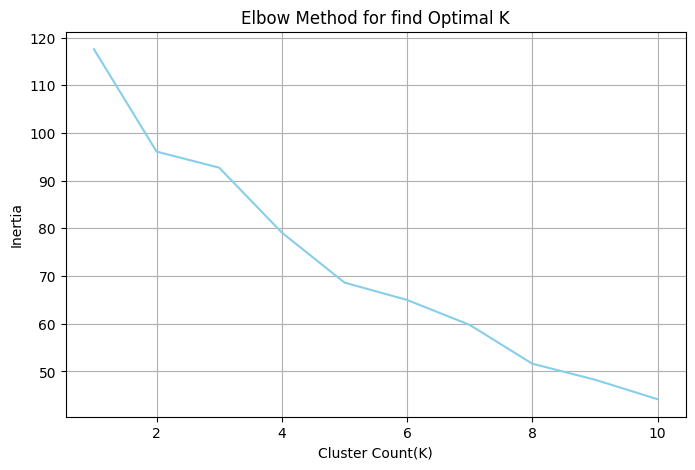

In [36]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, color='skyblue')
plt.xlabel('Cluster Count(K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for find Optimal K')
plt.grid(True)
plt.show()

**2. Clustering process and save label cluster to df['cluster']**

In [37]:
n_clusters = 5  #Using Optimal K from Elbow Method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(tfidf_matrix)

<ipython-input-37-2225564914>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster'] = kmeans.fit_predict(tfidf_matrix)


In [38]:
df_clean

,NAMAKOS,TIPE,ALAMAT,FASILITAS,HARGA,FITUR_LENGKAP,cluster
0,kost mhome sidorejo salatiga,campur,sidorejo,kamar mandi wifi kloset kasur,1300000,campur sidorejo kamar mandi wifi kloset kasur,0
1,kost fadhil tipe a sidorejo,putri,sidomukti,kamar mandi wifi kasur,400000,putri sidomukti kamar mandi wifi kasur,1
2,kost graha sinta,putri,sidomukti,wifi kasur,425000,putri sidomukti wifi kasur,1
3,kost eve,putri,sidomukti,kamar mandi kasur,580000,putri sidomukti kamar mandi kasur,1
4,kost rumi hastuti sarjono i,putri,sidorejo,kamar mandi wifi kasur,600000,putri sidorejo kamar mandi wifi kasur,0
...,...,...,...,...,...,...,...
236,kost ibu lina tipe a,putra,sidorejo,wifi kasur akses 24 jam,400000,putra sidorejo wifi kasur akses 24 jam,3
237,kost felix tipe a,putra,sidorejo,wifi kloset kasur akses 24 jam,550000,putra sidorejo wifi kloset kasur akses 24 jam,3
256,kost ayoem vip,putri,sidorejo,kamar mandi wifi ac kloset kasur akses 24 jam,1350000,putri sidorejo kamar mandi wifi ac kloset kasu...,2
257,kost cabean 131,putri,sidomukti,kamar mandi wifi kasur,400000,putri sidomukti kamar mandi wifi kasur,1


**3 Cluster Identification**


Cluster 0:


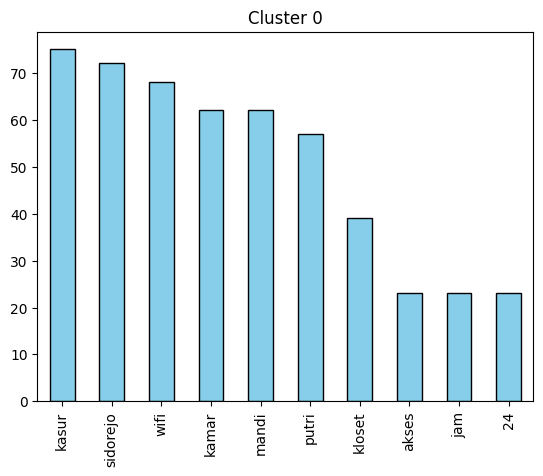


Cluster 1:


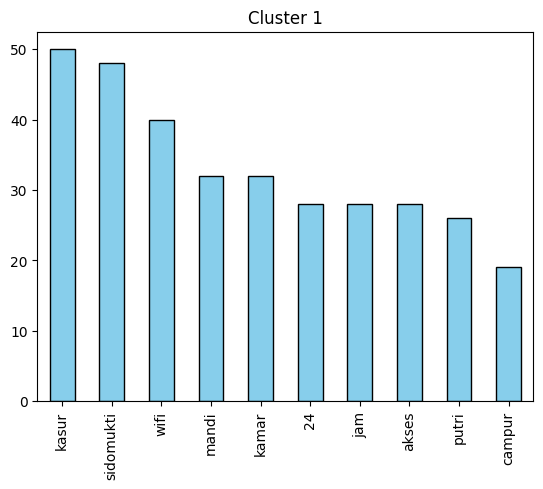


Cluster 4:


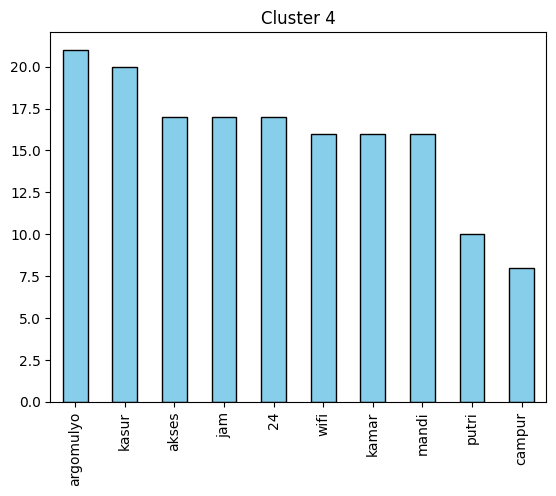


Cluster 2:


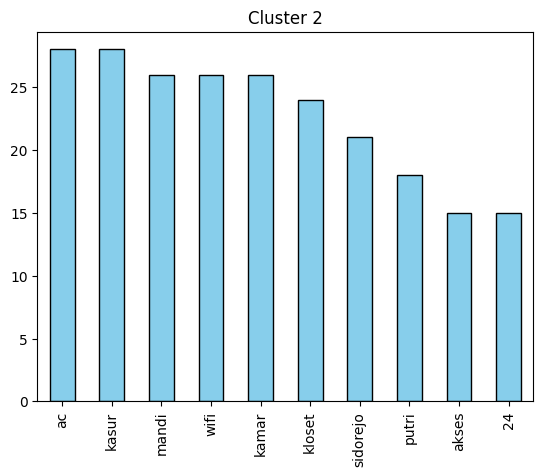


Cluster 3:


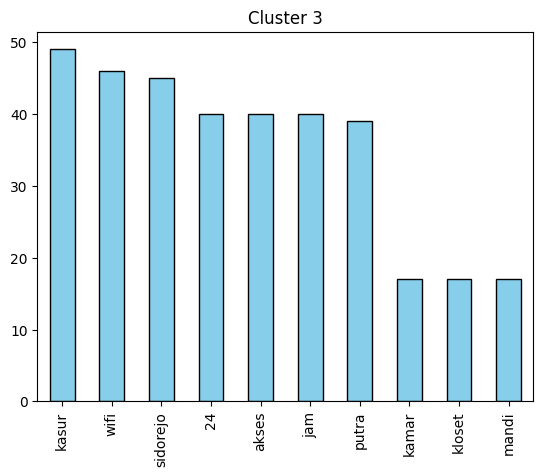

In [39]:
for i in df_clean['cluster'].unique():
    print(f"\nCluster {i}:")
    fitur_cluster = df_clean[df_clean['cluster'] == i]['FITUR_LENGKAP']
    all_words = " ".join(fitur_cluster).split()
    pd.Series(all_words).value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black', title=f'Cluster {i}')
    plt.show()

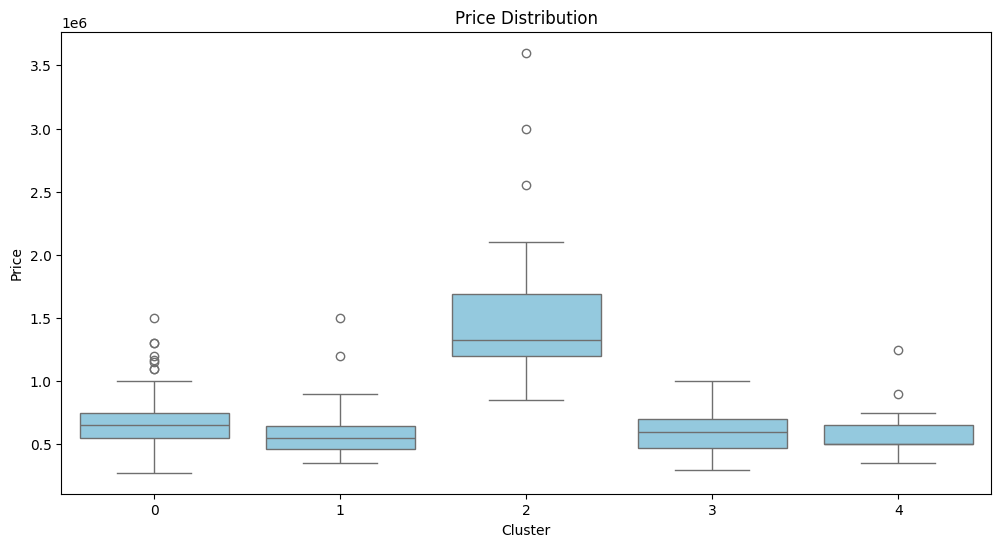

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='HARGA', data=df_clean, color= 'skyblue')
plt.title('Price Distribution')
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.show()

In [41]:
# Calculate median price per cluster
median_per_cluster = df_clean.groupby('cluster')['HARGA'].median()

# Loop through each cluster
for i in df_clean['cluster'].unique():
    print(f"\nCluster {i}:")

    # Filter features for the current cluster
    cluster_features = df_clean[df_clean['cluster'] == i]['FITUR_LENGKAP']
    all_words = " ".join(cluster_features).split()

    # Top 10 features
    top_words = pd.Series(all_words).value_counts().head(10)
    print("Top 10 Features:")
    print(top_words)

    # Median price for the current cluster
    median_price = median_per_cluster[i]
    print(f"Median Price: Rp {median_price:,}")

    print("-" * 50)



Cluster 0:
Top 10 Features:
kasur       75
sidorejo    72
wifi        68
kamar       62
mandi       62
putri       57
kloset      39
akses       23
jam         23
24          23
Name: count, dtype: int64
Median Price: Rp 650,000.0
--------------------------------------------------

Cluster 1:
Top 10 Features:
kasur        50
sidomukti    48
wifi         40
mandi        32
kamar        32
24           28
jam          28
akses        28
putri        26
campur       19
Name: count, dtype: int64
Median Price: Rp 550,000.0
--------------------------------------------------

Cluster 4:
Top 10 Features:
argomulyo    21
kasur        20
akses        17
jam          17
24           17
wifi         16
kamar        16
mandi        16
putri        10
campur        8
Name: count, dtype: int64
Median Price: Rp 500,000.0
--------------------------------------------------

Cluster 2:
Top 10 Features:
ac          28
kasur       28
mandi       26
wifi        26
kamar       26
kloset      24
sidorejo    

**Cluster Insigth**

**Cluster 0**

- **Characteristics**:
  - Mostly located in **Sidorejo**, mainly for **female/mixed** tenants
  - Common facilities: **bed, Wi-Fi, bathroom, toilet**
- **Median Price**: Rp **650,000**
- **Conclusion**:  
  A standard female/mixed boarding house in **Sidorejo** with basic amenities and mid-range price.



**Cluster 1**

- **Characteristics**:
  - Focused in **Sidomukti**
  - Minimalist facilities: **bed, Wi-Fi, bathroom**
  - Mostly **female**, but some are **mixed**
- **Median Price**: Rp **550,000**
- **Conclusion**:  
  A budget-friendly kost in **Sidomukti**, perfect for students looking for low-cost basic living.



**Cluster 4**

- **Characteristics**:
  - Mainly in **Argomulyo**
  - Basic facilities: **Wi-Fi, bed, bathroom**
- **Median Price**: Rp **500,000**
- **Conclusion**:  
  A simple kost in **Argomulyo** with the lowest price among all clusters.



**Cluster 2**

- **Characteristics**:
  - Fully equipped: **AC, bathroom, toilet, 24-hour access**
  - Found in **Sidorejo** & nearby areas
  - Mostly **female-only** kosts
- **Median Price**: Rp **1,325,000**
- **Conclusion**:  
  A **premium kost** for females, ideal for those who want complete comfort and solid facilities.


**Cluster 3**

- **Characteristics**:
  - Concentrated in **Sidorejo**
  - Mostly **male-only** kosts
  - Decent facilities: **Wi-Fi, 24-hour access, toilet, bathroom**
- **Median Price**: Rp **600,000**
- **Conclusion**:  
  A **male kost** with standard-plus facilities in **Sidorejo** and flexible access.


**4 Create recommendation system using clustering method**

In [42]:
def clusterbased_recommendation(namakos_input, top_n=5):
    if namakos_input not in df_clean['NAMAKOS'].values:
        return f"Kosan {namakos_input} tidak ditemukan."

    target_cluster = df_clean[df_clean['NAMAKOS'] == namakos_input]['cluster'].values[0]
    recommendation = df_clean[(df_clean['cluster'] == target_cluster) & (df_clean['NAMAKOS'] != namakos_input)]

    return recommendation.head(top_n)[['NAMAKOS','ALAMAT','TIPE','FASILITAS','HARGA','cluster']]


**5. Check recommendation system**

In [43]:
df_clean.sample(random_state= 42)

,NAMAKOS,TIPE,ALAMAT,FASILITAS,HARGA,FITUR_LENGKAP,cluster
9,kost wisma shallom tipe 1,putri,sidorejo,kamar mandi wifi kasur,650000,putri sidorejo kamar mandi wifi kasur,0


In [44]:
clusterbased_recommendation('kost wisma shallom tipe 1')

,NAMAKOS,ALAMAT,TIPE,FASILITAS,HARGA,cluster
0,kost mhome sidorejo salatiga,sidorejo,campur,kamar mandi wifi kloset kasur,1300000,0
4,kost rumi hastuti sarjono i,sidorejo,putri,kamar mandi wifi kasur,600000,0
6,kost sunsetview,sidorejo,putri,kamar mandi wifi kasur,650000,0
17,kost prima,sidorejo,putri,kamar mandi wifi kloset kasur,650000,0
20,kost lovina,sidorejo,putri,kamar mandi wifi kasur,675000,0


# Model Evaluation
In model evaluation, we use two different evaluation metrics because each approach has its own characteristics and requires distinct methods of assessment. Using appropriate metrics ensures that we accurately measure the model’s performance based on its specific objective and context.

---

**1. Content Based Filtering : silhouette score**

*Precision* is a crucial metric for evaluating the performance of a classification model. It helps us understand how accurate the model is in identifying positive instances. A high precision score indicates that the model rarely makes false positive predictions, meaning its positive predictions are more trustworthy.


**Precision is calculated using the formula:**

$$Presisi = \frac{TP}{TP + FP}$$

Where:

* **TP (True Positive)**: The number of instances correctly predicted as positive.

* **FP (False Positive)**: The number of instances incorrectly predicted as positive (actually negative).

---

**2. Cluster Based Filtering : Silhouette Score**

*Silhouette Score* is a metric used to evaluate the quality of clusters created during unsupervised machine learning, such as with the K-Means algorithm. It measures how well-defined and distinct the clusters are. The score for each data sample is calculated based on its relationship with other samples both inside and outside its own cluster.

**Silhouette Score is calculated using the formula:**

$$ s(i) = \frac {b(i) - a(i)} {max(a(i), b(i))} $$

where :
* **a(i)** - Cohesion: The average distance from one data point to all other points in the same cluster.
* **b(i)** - Separation: The average distance from one data point to all points in the nearest other cluster.

**overall :**

if score
* **Close to +1**: Excellent cluster separation—the data points are far apart from other clusters and well grouped within their own cluster.

* **Close to 0:** Weak separation—the data points are near the boundary of two clusters, so cluster assignments are less distinct.

* **Close to –1:** Poor clustering—the data points may have been assigned to the wrong cluster entirely.  

**1. Content Based Filtering Evaluation Using Precision**

In [48]:
test_data = df_clean.sample(random_state=10)
test_data

,NAMAKOS,TIPE,ALAMAT,FASILITAS,HARGA,FITUR_LENGKAP,cluster
96,kost rumah cemara tipe b,putri,sidorejo,kamar mandi wifi kasur,725000,putri sidorejo kamar mandi wifi kasur,0


In [50]:
#Take The NAMAKOS
eval = test_data['NAMAKOS'].tolist()
eval = test_data['NAMAKOS'].iloc[0]

#Check Kos Reccomendation
rekomendasi_kosan(nama_kos_input= eval)

,NAMAKOS,TIPE,ALAMAT,FASILITAS,FITUR_LENGKAP,HARGA,Skor_Kemiripan
0,kost sagitta,putri,sidorejo,kamar mandi wifi kasur,putri sidorejo kamar mandi wifi kasur,450000,1.0
1,kost mak yani kmy,putri,sidorejo,kamar mandi wifi kasur,putri sidorejo kamar mandi wifi kasur,500000,1.0
2,kost elfarin tipe a,putri,sidorejo,kamar mandi wifi kasur,putri sidorejo kamar mandi wifi kasur,550000,1.0
3,kost natalia,putri,sidorejo,kamar mandi wifi kasur,putri sidorejo kamar mandi wifi kasur,500000,1.0
4,kost rumi hastuti sarjono i,putri,sidorejo,kamar mandi wifi kasur,putri sidorejo kamar mandi wifi kasur,600000,1.0


The **recommendation system** achieved a **100% precision score**.  
This is because the system generated recommendations that have **identical `FITUR_LENGKAP` features** to the sample input used for the recommendation query.

All recommended items were **exactly relevant**, meaning there were no false positives — every suggestion matched the sample’s characteristics.

**Precision is calculated using the formula:**

$$Presisi = \frac{TP}{TP + FP}$$

Where:

* **TP (True Positive)**: The number of instances correctly predicted as positive.

* **FP (False Positive)**: The number of instances incorrectly predicted as positive (actually negative).

---

 **Precision Calculation:**
$$
\text{Precision} = \frac{5}{5 + 0} = 1.0 \ (100\%)
$$

**2. Cluster Based Filtering Evaluation Using Sillhouete Score**

In [47]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(tfidf_matrix, df_clean['cluster'])
print(f'Clustering Based Filtering Silhouette Score: {silhouette_avg}')

Clustering Based Filtering Silhouette Score: 0.2624734645229076



```
Clustering Based Filtering Silhouette Score: 0.2624734645229076
```



A low silhouette value indicates that the clustering result is **not good**. Many data are on the boundaries between clusters, which means **the separation between groups is not clear**. It is recommended to re-evaluate the number of clusters, the algorithm used, or perform feature engineering for more optimal results.